# Import tools

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

# Import data

In [2]:
df1=pd.read_csv('data_google_playstore/googleplaystore.csv')
df1.head()
# this contains the features 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df2=pd.read_csv('data_google_playstore/googleplaystore_user_reviews.csv')
df2.head()
# this contains the thing we want to predict

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# EDA of data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [6]:
# force reviews into numeric
df1['Reviews']=pd.to_numeric(df1['Reviews'], errors='coerce')

In [7]:
# create a new column if null revies
df1['Reviews_isnull']=df1['Reviews'].isnull()
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,False


In [8]:
# create a new column if null revies
df1['Ratings_isnull']=df1['Rating'].isnull()
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull,Ratings_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,False,False


In [9]:
df1['Reviews']=pd.to_numeric(df1['Reviews'])

# Correlation matrix

In [10]:
# join types: (INNER| (LEFT|RIGHT|FULL) OUTER)
merged_df = pd.merge(df1, df2, on="App", how="inner")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_isnull,Ratings_isnull,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False,False,I love colors inspyering,Positive,0.500,0.600000


In [11]:
merged_df.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Reviews_isnull               bool
Ratings_isnull               bool
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [12]:
merged_df['Price'].value_counts()
# we should remove symbols

0         121108
$3.99        360
$11.99       320
$9.99        200
$33.99       160
$6.99         80
$3.95         80
$2.49         80
$0.99         80
$1.99         40
$4.99         40
$2.99         40
$29.99        40
$7.99         34
Name: Price, dtype: int64

In [13]:
merged_df['Installs'].value_counts()
# drop plus sign

10,000,000+       28076
100,000,000+      24740
1,000,000+        18040
5,000,000+        16880
50,000,000+        9420
100,000+           8064
500,000+           6488
1,000,000,000+     3960
500,000,000+       3334
10,000+            1709
50,000+            1471
1,000+              400
5,000+               80
Name: Installs, dtype: int64

In [14]:
merged_df['Installs_num'] = merged_df['Installs'].str.replace("+",'')

C:\Users\glori\AppData\Local\Temp/ipykernel_3496/3198092474.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['Installs_num'] = merged_df['Installs'].str.replace("+",'')


In [15]:
merged_df['Installs_num']

0            500,000
1            500,000
2            500,000
3            500,000
4            500,000
             ...    
122657    10,000,000
122658    10,000,000
122659    10,000,000
122660    10,000,000
122661    10,000,000
Name: Installs_num, Length: 122662, dtype: object

In [16]:
merged_df['Installs_num'] = merged_df['Installs'].str.replace(',','')

In [17]:
merged_df['Installs_num'].value_counts()

10000000+      28076
100000000+     24740
1000000+       18040
5000000+       16880
50000000+       9420
100000+         8064
500000+         6488
1000000000+     3960
500000000+      3334
10000+          1709
50000+          1471
1000+            400
5000+             80
Name: Installs_num, dtype: int64

In [18]:
# merged_df['Installs_num'] = pd.to_numeric(merged_df['Installs_num'])
merged_df['Installs_num']=merged_df['Installs_num'].str.extract(r'(\d+)')

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  float64
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Reviews_isnull          122662 non-null  bool   
 14  Ratings_isnull      

In [20]:
merged_df['Price'].unique()

array(['0', '$6.99', '$1.99', '$4.99', '$3.99', '$2.99', '$11.99',
       '$9.99', '$7.99', '$33.99', '$3.95', '$29.99', '$2.49', '$0.99'],
      dtype=object)

In [21]:
import re

In [22]:
# ('\d+') finds all numeric characters
merged_df['Price_num']=merged_df['Price'].str.extract(r'(\d+)')

In [23]:
merged_df['Price_num'].unique()

array(['0', '6', '1', '4', '3', '2', '11', '9', '7', '33', '29'],
      dtype=object)

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  float64
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Reviews_isnull          122662 non-null  bool   
 14  Ratings_isnull      

In [25]:
merged_df['Price_num'] = pd.to_numeric(merged_df['Price_num'])

In [26]:

merged_df['Installs_num'] = pd.to_numeric(merged_df['Installs_num'])

In [27]:
merged_df['Size'].unique()

array(['14M', '33M', '37M', '39M', '12M', '25M', '6.1M', '11M',
       'Varies with device', '15M', '24M', '17M', '2.4M', '27M', '16M',
       '2.9M', '38M', '21M', '52M', '8.2M', '4.2M', '2.8M', '5.0M',
       '5.9M', '19M', '73M', '6.8M', '4.0M', '10M', '2.1M', '42M', '30M',
       '29M', '3.9M', '18M', '3.2M', '20M', '26M', '48M', '22M', '8.5M',
       '28M', '46M', '23M', '7.1M', '40M', '7.8M', '6.6M', '5.1M', '79k',
       '32M', '2.2M', '4.7M', '2.7M', '13M', '118k', '44M', '7.3M',
       '695k', '6.2M', '56M', '3.1M', '31M', '8.0M', '7.9M', '1.4M',
       '7.2M', '3.8M', '41M', '9.0M', '4.9M', '8.1M', '3.7M', '4.5M',
       '2.6M', '6.9M', '7.4M', '1.9M', '1.8M', '2.3M', '5.2M', '1.2M',
       '59M', '5.6M', '72M', '9.6M', '43M', '3.6M', '9.5M', '8.9M', '65M',
       '79M', '8.4M', '58M', '50M', '45M', '53M', '68M', '66M', '35M',
       '76M', '9.4M', '4.3M', '67M', '60M', '5.5M', '3.3M', '7.5M',
       '9.1M', '8.3M', '9.2M', '7.0M', '77M', '5.7M', '5.3M', '232k',
       '99M',

In [28]:
merged_df.drop(['Size'], axis = 1, inplace=True)
merged_df.reset_index(drop=True, inplace=True)

In [29]:
merged_df.isna().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Reviews_isnull                0
Ratings_isnull                0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
Installs_num                  0
Price_num                     0
dtype: int64

In [30]:
df_clean=merged_df.dropna()
df_clean.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Reviews_isnull            0
Ratings_isnull            0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Installs_num              0
Price_num                 0
dtype: int64

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
corr_fields=df_clean[['Rating','Reviews','Sentiment_Polarity','Installs_num','Price_num']]

In [33]:
corr_matrix = corr_fields.corr(method='pearson')
corr_matrix

,Rating,Reviews,Sentiment_Polarity,Installs_num,Price_num
Rating,1.000000,0.129641,0.052034,-0.002768,-0.014553
Reviews,0.129641,1.000000,-0.107275,0.520726,-0.029354
Sentiment_Polarity,0.052034,-0.107275,1.000000,-0.060374,0.028065
Installs_num,-0.002768,0.520726,-0.060374,1.000000,-0.031598
Price_num,-0.014553,-0.029354,0.028065,-0.031598,1.000000


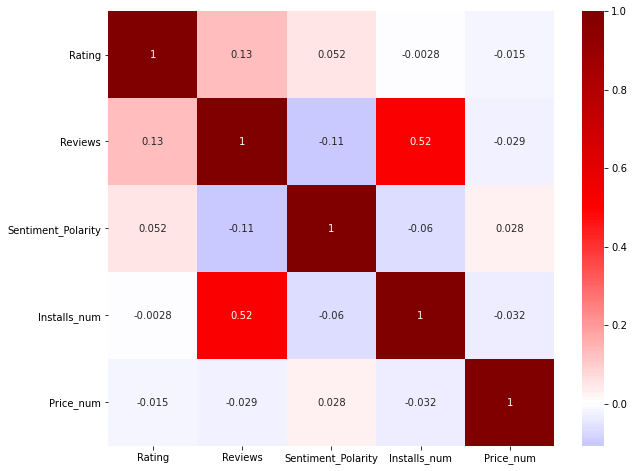

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,
           cmap='seismic',
           center=0,
           annot=True,
           );

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df_clean[['Reviews']],df_clean[['Installs_num']])